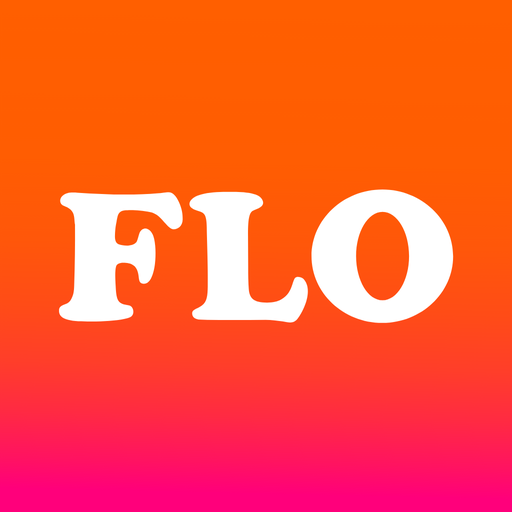
# About Dataset

FLO wants to set a roadmap for sales and marketing activities.

In order for the company to make a medium-long-term plan, it is necessary to estimate the potential value that existing customers will provide to the company in the future.

At this point, we will score and segment flo's products and offer special campaigns to customers in the segments we have allocated.

The dataset consists of information obtained from the past shopping behavior of customers who made their last purchases from OmniChannel (both online and offline) between 2020 and 2021.

### Dataset Columns

- master_id: Unique client number
- order_channel : Which channel of the shopping platform is used (Android, ios, Desktop, Mobile, Offline)
- last_order_channel : The channel where the last purchase was made
- first_order_date : The date of the first purchase made by the customer
- last_order_date : The date of the last purchase made by the customer
- last_order_date_online : The date of the last purchase made by the customer on the online platform
- last_order_date_offline : The date of the last purchase made by the customer on the offline platform
- order_num_total_ever_online : The total number of purchases made by the customer on the online platform
- order_num_total_ever_offline : Total number of purchases made by the customer offline
- customer_value_total_ever_offline : The total price paid by the customer for offline purchases
- customer_value_total_ever_online : The total price paid by the customer for their online shopping
- interested_in_categories_12 : List of categories the customer has shopped in the last 12 months


# Steps

### 1. Data Preprocessing

**Data preprocessing** is a critical step in data analysis and machine learning, as it involves transforming raw data into a format that is suitable for analysis or model training. This process can include cleaning the data by removing duplicates, correcting errors, and handling missing values, as well as transforming the data by scaling or normalizing it, feature engineering, and selecting relevant variables. The goal of data preprocessing is to improve the quality of the data and reduce the noise, so that it can be analyzed effectively and used to develop accurate models that provide meaningful insights. Overall, data preprocessing is a crucial step in any data science project, as it can greatly impact the accuracy and effectiveness of the resulting models.

### 2. Creating the CLTV Data Structure

**CLTV (Customer Lifetime Value)** is a metric that measures the total value of a customer's long-term relationship with a company. This value is obtained by subtracting the total costs incurred by the company during the customer's use of its products or services from the total revenues generated by the customer for the company. A high CLTV indicates the success of a company's customer-centric approach.

### 3. BG/NBD, Establishment of Gamma-Gamma Models, Calculation of CLTV
**BG/NBD** is a probabilistic model that models customer purchase behavior. This model is used to predict the probability of customers making repeat purchases within a certain period. The model is based on customer behavior in terms of purchase frequency and purchase amounts, and uses this data to predict their future purchase behavior.

**The Gamma-Gamma model** is a statistical model used to estimate the expected monetary value (EMV) of customers for a company. This model is used in conjunction with the Pareto/NBD model and is based on the assumption that the variance of the transaction values is proportional to the mean transaction value. The Gamma-Gamma model estimates the variance of the transaction values and allows for the calculation of the EMV, which is a measure of a customer's lifetime value in terms of the monetary value they bring to the company.

### 4. Creating Segments by CLTV

1**CLTV segments** refer to the grouping of customers based on their estimated Customer Lifetime Value (CLTV). These segments are used to identify and target customers with the highest potential value to the company. Common CLTV segments include high-value, medium-value, and low-value customers, with each group having specific characteristics that can inform targeted marketing and retention strategies. By segmenting customers based on their CLTV, companies can allocate their resources more effectively and maximize the return on investment of their marketing efforts.

In [1]:
!pip install lifetimes    # we should pip isntall lifetimes
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sbn
from lifetimes import BetaGeoFitter
from lifetimes.plotting import plot_period_transactions
from lifetimes import GammaGammaFitter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 4.2 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('/kaggle/input/flo-data-20k/flo_data_20k.csv')

# EDA(Exploratory Data Analysis)

In [3]:
def eda(dataframe):
    print(f"""
    
    -- Info --
    
    {dataframe.dtypes}
    
    -- NaN Values --
    
    {dataframe.isnull().sum()}
    
    -- Shape --
    
    {dataframe.shape}
    
    -- Unique --
    
    {df.apply(lambda x: x.nunique())}
    
    -- Head --
    """)
    
    
    return dataframe.head()
eda(df)


    
    -- Info --
    
    master_id                             object
order_channel                         object
last_order_channel                    object
first_order_date                      object
last_order_date                       object
last_order_date_online                object
last_order_date_offline               object
order_num_total_ever_online          float64
order_num_total_ever_offline         float64
customer_value_total_ever_offline    float64
customer_value_total_ever_online     float64
interested_in_categories_12           object
dtype: object
    
    -- NaN Values --
    
    master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offl

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


Data were recorded in two different ways, online and offline. We will make them a single variable

In [4]:
df["order_num_total"] = df["order_num_total_ever_online"] + df["order_num_total_ever_offline"]
df["customer_value_total"] = df["customer_value_total_ever_offline"] + df["customer_value_total_ever_online"]
df = df[~(df["customer_value_total"] == 0) | (df["order_num_total"] == 0)]

In [5]:
df[df.columns[df.columns.str.contains("date")]].dtypes

first_order_date           object
last_order_date            object
last_order_date_online     object
last_order_date_offline    object
dtype: object

Date type variables are saved as objects. we will convert it to datetime data type

In [6]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)

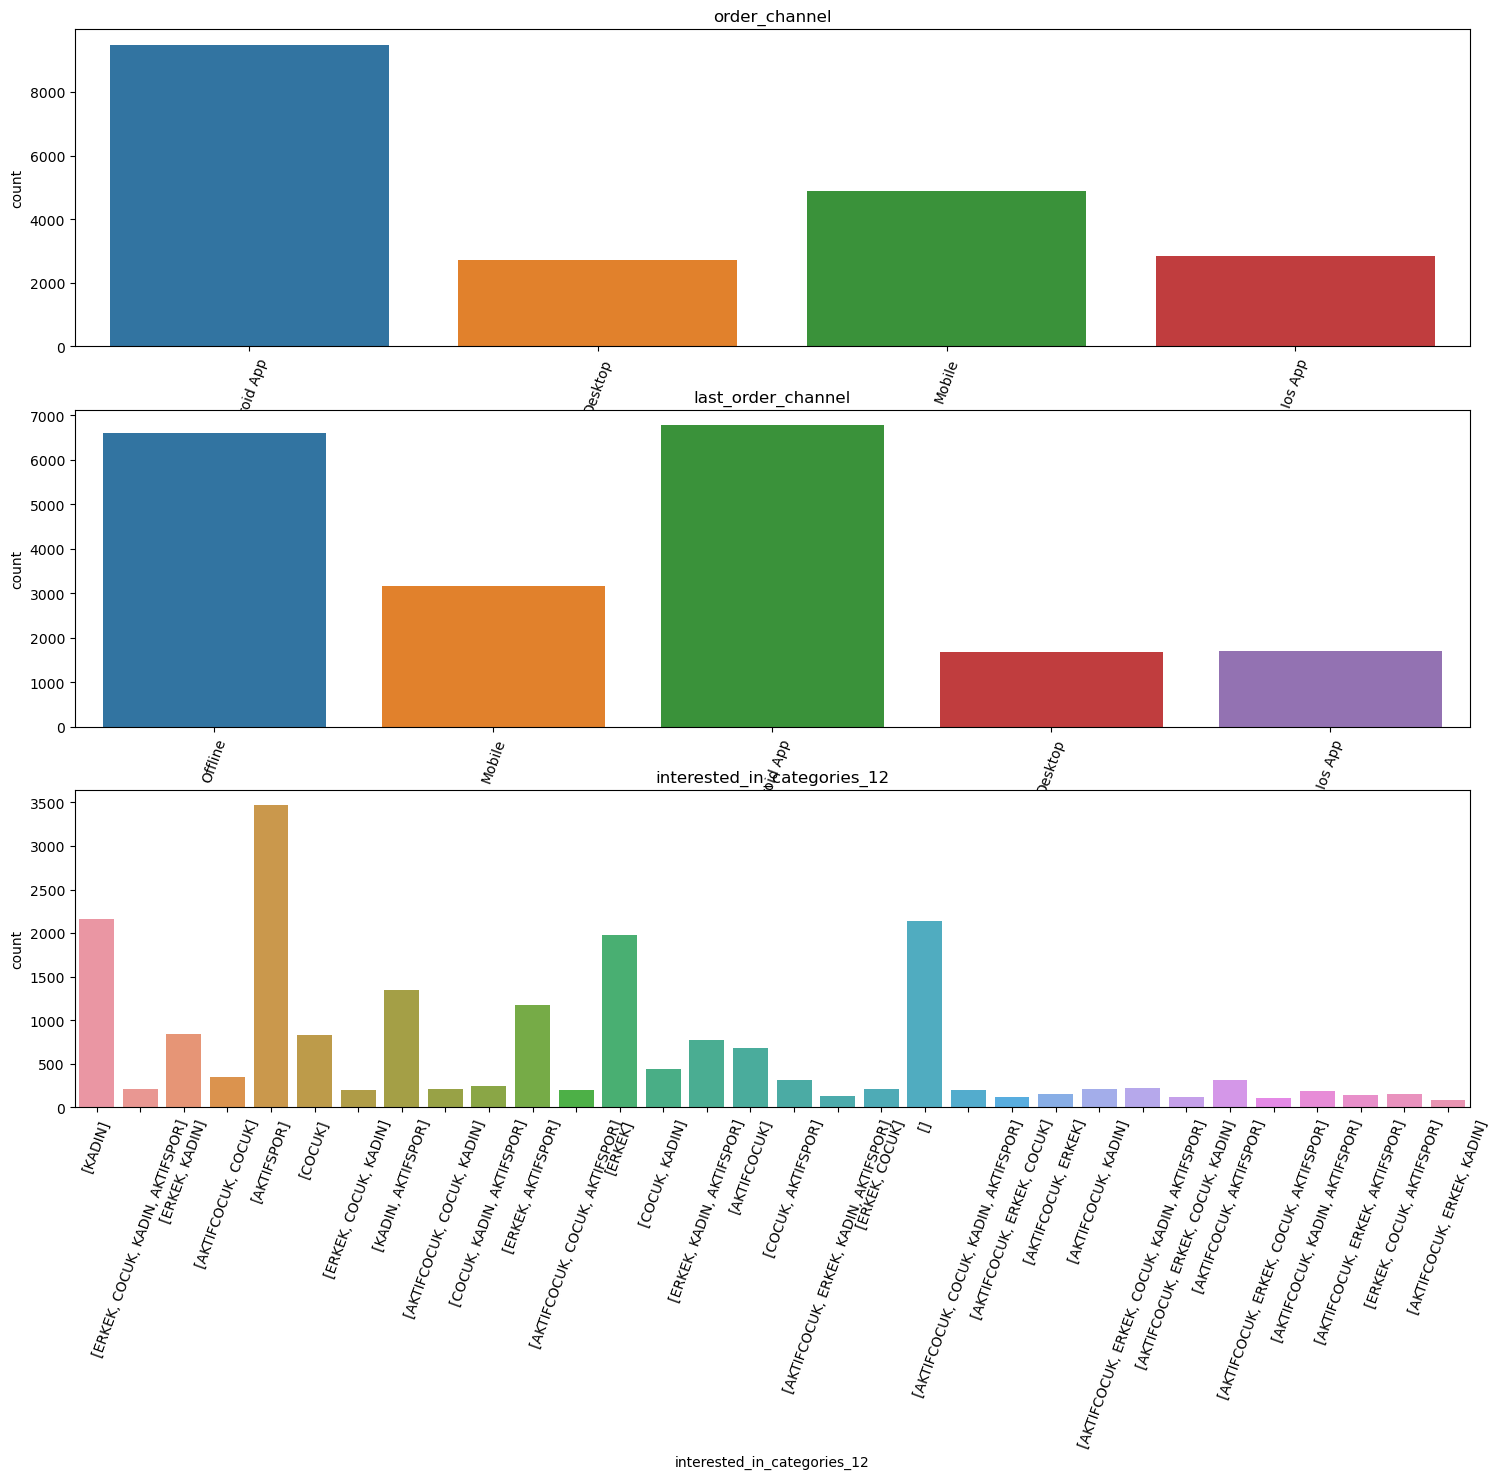

In [7]:
columns = ['order_channel','last_order_channel','interested_in_categories_12']
plt.figure(figsize=(18,14))
x, y = 1,3
for i,column in enumerate(df[columns]):  
    plt.subplot(y, x, i+1)
    sbn.countplot(x = df[column])
    plt.title(column)
    plt.xticks(rotation = 70)
plt.show()

### Suppressing outliers

Suppressing outliers refers to the process of removing or modifying extreme values in a dataset that are considered as outliers. Outliers are data points that are significantly different from other data points and are often the result of erroneous measurements or recordings. These values can have unwanted effects on data analysis and modeling and can lead to misleading results. Suppressing outliers is an important step to improve the quality of the dataset and obtain accurate results.

In [8]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = round(low_limit,0)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = round(up_limit,0)
    
columns = ["order_num_total_ever_online", "order_num_total_ever_offline", "customer_value_total_ever_offline","customer_value_total_ever_online"]
for col in columns:
    replace_with_thresholds(df, col)

# Creating the CLTV Data Structure

I took 2 days after the date of the last purchase in the dataset as the analysis date.

In [9]:
df["last_order_date"].max() # 2021-05-30
analysis_date = dt.datetime(2021,6,1)

Create a new cltv dataframe with; customer_id, recency_cltv_weekly, T_weekly, frequency and monetary_cltv_avg values.

In [10]:
cltv_df = pd.DataFrame()
cltv_df["customer_id"] = df["master_id"]
cltv_df["recency_cltv_weekly"] = ((df["last_order_date"]- df["first_order_date"]).astype('timedelta64[D]')) / 7
cltv_df["T_weekly"] = ((analysis_date - df["first_order_date"]).astype('timedelta64[D]'))/7
cltv_df["frequency"] = df["order_num_total"]
cltv_df["monetary_cltv_avg"] = df["customer_value_total"] / df["order_num_total"]

cltv_df.head()


,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000


# BG/NBD and Gamma-Gamma Models

### BG/NBD model

In [11]:
bgf = BetaGeoFitter(penalizer_coef=0.001)
bgf.fit(cltv_df['frequency'],
        cltv_df['recency_cltv_weekly'],
        cltv_df['T_weekly']
        )

<lifetimes.BetaGeoFitter: fitted with 19945 subjects, a: 0.00, alpha: 71.57, b: 0.26, r: 3.48>

Expected purchases from customers within 3 and 6 months

In [12]:
cltv_df["exp_sales_3_month"] = bgf.predict(4*3,
                                       cltv_df['frequency'],
                                       cltv_df['recency_cltv_weekly'],
                                       cltv_df['T_weekly'])


cltv_df["exp_sales_6_month"] = bgf.predict(4*6,
                                       cltv_df['frequency'],
                                       cltv_df['recency_cltv_weekly'],
                                       cltv_df['T_weekly'])
cltv_df.head()


,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000,0.995983,1.991959
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333,0.990909,1.981816
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000,0.676272,1.352541
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000,0.711125,1.422243
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000,0.393603,0.787204


10 people who will make the most purchases in the 3th month

In [13]:
cltv_df.sort_values("exp_sales_3_month",ascending=False)[:10]

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.714286,67.285714,70.0,263.479571,6.349962,12.699905
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,111.571429,119.714286,83.0,51.088675,5.424987,10.849963
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,394.000000,398.571429,202.0,227.252970,5.244657,10.489310
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,104.428571,120.142857,77.0,67.325325,5.035152,10.070292
14402,03f502d4-a559-11e9-a2fc-000d3a38a36f,104.714286,118.714286,61.0,45.220820,4.065874,8.131740
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,133.142857,147.142857,68.0,541.445441,3.921505,7.843002
8043,4a51668a-a155-11e9-a2fc-000d3a38a36f,87.142857,98.857143,51.0,86.154118,3.835726,7.671443
15611,4a7e875e-e6ce-11ea-8f44-000d3a38a36f,39.714286,40.000000,29.0,165.297586,3.493173,6.986332
18067,695889b4-d6ed-11e9-93bc-000d3a38a36f,91.857143,103.857143,47.0,175.458085,3.452815,6.905622
8328,1902bf80-0035-11eb-8341-000d3a38a36f,28.857143,33.285714,25.0,97.439600,3.259070,6.518127


10 people who will make the most purchases in the 6th month

In [14]:
cltv_df.sort_values("exp_sales_6_month",ascending=False)[:10]

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.714286,67.285714,70.0,263.479571,6.349962,12.699905
6322,329968c6-a0e2-11e9-a2fc-000d3a38a36f,111.571429,119.714286,83.0,51.088675,5.424987,10.849963
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,394.000000,398.571429,202.0,227.252970,5.244657,10.489310
9347,44d032ee-a0d4-11e9-a2fc-000d3a38a36f,104.428571,120.142857,77.0,67.325325,5.035152,10.070292
14402,03f502d4-a559-11e9-a2fc-000d3a38a36f,104.714286,118.714286,61.0,45.220820,4.065874,8.131740
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,133.142857,147.142857,68.0,541.445441,3.921505,7.843002
8043,4a51668a-a155-11e9-a2fc-000d3a38a36f,87.142857,98.857143,51.0,86.154118,3.835726,7.671443
15611,4a7e875e-e6ce-11ea-8f44-000d3a38a36f,39.714286,40.000000,29.0,165.297586,3.493173,6.986332
18067,695889b4-d6ed-11e9-93bc-000d3a38a36f,91.857143,103.857143,47.0,175.458085,3.452815,6.905622
8328,1902bf80-0035-11eb-8341-000d3a38a36f,28.857143,33.285714,25.0,97.439600,3.259070,6.518127


Top 10 purchases in month 3 and month 6 are similar

### Gamma-Gamma model

In [15]:
ggf = GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(cltv_df['frequency'], cltv_df['monetary_cltv_avg'])
cltv_df["exp_average_value"] = ggf.conditional_expected_average_profit(cltv_df['frequency'],
                                                                cltv_df['monetary_cltv_avg'])
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000,0.995983,1.991959,193.632763
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333,0.990909,1.981816,96.665051
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000,0.676272,1.352541,120.967652
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000,0.711125,1.422243,67.320130
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000,0.393603,0.787204,114.325181


Calculate 3 and 6-month CLTV

In [16]:
cltv = ggf.customer_lifetime_value(bgf,
                                   cltv_df['frequency'],
                                   cltv_df['recency_cltv_weekly'],
                                   cltv_df['T_weekly'],
                                   cltv_df['monetary_cltv_avg'],
                                   time=6,
                                   freq="W",
                                   discount_rate=0.01)
cltv_df["cltv"] = cltv
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000,0.995983,1.991959,193.632763,404.694063
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333,0.990909,1.981816,96.665051,201.001990
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000,0.676272,1.352541,120.967652,171.667110
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000,0.711125,1.422243,67.320130,100.458381
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000,0.393603,0.787204,114.325181,94.427104


20 people with the highest CLTV

In [17]:
cltv_df.sort_values("cltv",ascending=False)[:20]

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv
9055,47a642fe-975b-11eb-8c2a-000d3a38a36f,2.857143,7.857143,4.0,5176.585000,1.129743,2.259477,5348.278535,12679.128088
13880,7137a5c0-7aad-11ea-8f20-000d3a38a36f,6.142857,13.142857,11.0,2838.855455,2.050831,4.101651,2872.560329,12362.189050
4315,d5ef8058-a5c6-11e9-a2fc-000d3a38a36f,133.142857,147.142857,68.0,541.445441,3.921505,7.843002,542.523810,4464.458196
7330,a4d534a2-5b1b-11eb-8dbd-000d3a38a36f,62.714286,67.285714,70.0,263.479571,6.349962,12.699905,264.019264,3518.063500
11150,5d1c466a-9cfd-11e9-9897-000d3a38a36f,394.000000,398.571429,202.0,227.252970,5.244657,10.489310,227.416863,2502.863834
12438,625f40a2-5bd2-11ea-98b0-000d3a38a36f,74.285714,74.571429,16.0,622.081875,1.599364,3.198723,627.341618,2105.466549
7613,73fd19aa-9e37-11e9-9897-000d3a38a36f,383.000000,385.000000,82.0,413.635366,2.246607,4.493212,414.330066,1953.309130
18767,fc0ce7a4-9d87-11e9-9897-000d3a38a36f,102.571429,131.428571,20.0,605.157500,1.387770,2.775536,609.249826,1774.230196
17323,f59053e2-a503-11e9-a2fc-000d3a38a36f,51.714286,101.000000,7.0,1106.467143,0.728459,1.456916,1127.612061,1723.700674
8868,9ce6e520-89b0-11ea-a6e7-000d3a38a36f,3.428571,34.428571,8.0,601.226250,1.299063,2.598120,611.492854,1666.932592


# Creating Segments by CLTV

In [18]:
cltv_df["cltv_segment"] = pd.qcut(cltv_df["cltv"], 4, labels=["D", "C", "B", "A"])
cltv_df.head()

,customer_id,recency_cltv_weekly,T_weekly,frequency,monetary_cltv_avg,exp_sales_3_month,exp_sales_6_month,exp_average_value,cltv,cltv_segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,17.000000,30.571429,5.0,187.874000,0.995983,1.991959,193.632763,404.694063,A
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,209.857143,224.857143,21.0,95.883333,0.990909,1.981816,96.665051,201.001990,B
2,69b69676-1a40-11ea-941b-000d3a38a36f,52.285714,78.857143,5.0,117.064000,0.676272,1.352541,120.967652,171.667110,B
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.571429,20.857143,2.0,60.985000,0.711125,1.422243,67.320130,100.458381,D
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,83.142857,95.428571,2.0,104.990000,0.393603,0.787204,114.325181,94.427104,D


<AxesSubplot:xlabel='cltv', ylabel='Count'>

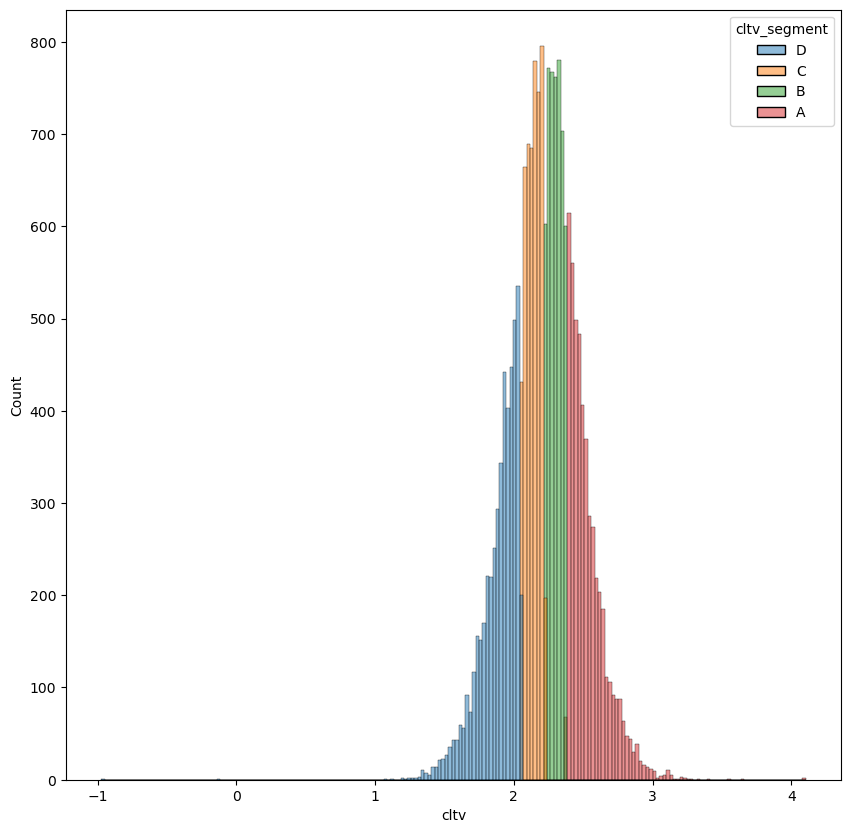

In [19]:
plt.figure(figsize = (10,10))
sbn.histplot(x = np.log10(cltv_df['cltv']), hue = cltv_df['cltv_segment'])